<h1 align="center" style="background-color:#616161;color:white">Raw Data Viewer</h1>

Report for viewing very basic information about the raw data prior to processing

In [22]:
import os
import sys
import pandas as pd
import csv
import json

%matplotlib inline

## Parameters you can change

# Abs path to settings file
#root = "C:/DS/Github/MusicRecommendation"  # BA, Windows
root = "/home/badrul/git/EventPrediction"  # BA, Linux

# Select the dataset to view
#datasetToUse ="inputfile_verysml" # inputfile , inputfile_hlf , or inputfile_verysml
datasetToUse ="inputfile_sml"


## Finish setting up
os.chdir(root)
## Add the prelim module
fPath = root + "/1_codemodule"
if fPath not in sys.path: sys.path.append(fPath)
from coreCode import *

<a id='Load Data'></a>
<h3 style="background-color:#616161;color:white">Load Data</h3>

In [2]:
settingsDict =  loadSettings()
fPath = root + settingsDict[datasetToUse]

colHeadings=['UserID','Timestamp','ArtistID','ArtistName','TrackID','TrackName']
dataFormat={'UserID': str, 'Timestamp': str, 'ArtistID' :str, 'ArtistName': str, 'TrackID': str, 'TrackName': str}

parse_dates = ['Timestamp']

if dataFormat=="": 
    inpData = pd.read_csv(fPath, sep='\t', error_bad_lines= False,quoting=csv.QUOTE_NONE, header=None,names=colHeadings)
else:
    inpData = pd.read_csv(fPath, sep='\t', error_bad_lines= False,quoting=csv.QUOTE_NONE, header=None,names=colHeadings, dtype=dataFormat,parse_dates=parse_dates)

<a id='First 5 rows'></a>
<h3 style="background-color:#616161;color:white">First N rows</h3>

In [3]:
n = 5

In [4]:
subset =inpData[0:n]
subset

,UserID,Timestamp,ArtistID,ArtistName,TrackID,TrackName
0,user_000001,2009-05-04 23:08:57,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04 13:54:10,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04 13:52:04,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04 13:42:52,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04 13:42:11,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


<a id='Describe the Data'></a>
<h3 style="background-color:#616161;color:white">Describe the Data</h3>

In [5]:
inpData.describe()

,UserID,Timestamp,ArtistID,ArtistName,TrackID,TrackName
count,1000000,1000000,968391,1000000,865616,1000000
unique,41,993607,19088,23007,126986,133157
top,user_000033,2009-02-11 12:14:38,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,82558949-cd98-4c58-af35-3f1a9430d52e,Heartless
freq,96436,33,27267,27267,2069,2121
first,NaN,2005-02-28 23:20:27,NaN,NaN,NaN,NaN
last,NaN,2009-06-19 17:12:30,NaN,NaN,NaN,NaN


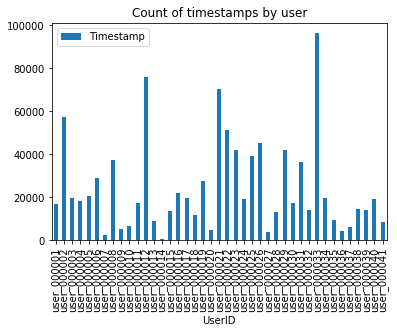

In [34]:
a=inpData[['UserID','Timestamp']].groupby(['UserID']).count()
a.plot(kind='bar',title='Count of timestamps by user')

<a id='Custom Query'></a>
<h3 style="background-color:#616161;color:white">Custom Query</h3>

In [36]:
# Source: https://chrisalbon.com/python/pandas_select_rows_multiple_filters.html
qUser = 'user_000001'
qStartDate = '2007-11-22'
qEndDate = '2007-11-23'


inpData[(inpData['UserID'] == qUser) & (inpData['Timestamp'] >= qStartDate) & (inpData['Timestamp'] < qEndDate)]

,UserID,Timestamp,ArtistID,ArtistName,TrackID,TrackName
12760,user_000001,2007-11-22 15:06:54,0c118139-3407-4734-9ab3-bd963027c3d7,Uriel,NaN,Cosmic Breeze
12761,user_000001,2007-11-22 14:59:53,eb709c13-58ca-473b-a454-05955205d177,Cai,NaN,Absolute
12762,user_000001,2007-11-22 14:55:37,18d33ad8-40c3-4a27-bd6d-55f78fc455e9,Precyz,2eb147e3-4bbf-4f2e-9a8b-3fdc62ad858b,Baracumbara
12763,user_000001,2007-11-22 14:45:58,e200ef60-9626-49ed-b761-864acef70d2a,Karma,ccef8f4b-2c0a-41a7-81fd-619f60f26305,"Modifications, Part 1"
12764,user_000001,2007-11-22 14:38:33,42edf21b-2dda-4382-aa6b-49b6483bcf73,Rob Dougan,NaN,Kurayamino Variation
12765,user_000001,2007-11-22 14:16:11,5dfa70d0-d170-4b5d-a901-e6c2edc96dd1,Vladimir Cosma,bc6ab757-1d23-4811-8f45-f546486148c3,Sentimental Walk
12766,user_000001,2007-11-22 14:11:30,e200ef60-9626-49ed-b761-864acef70d2a,Karma,ccef8f4b-2c0a-41a7-81fd-619f60f26305,"Modifications, Part 1"
12767,user_000001,2007-11-22 14:04:06,42edf21b-2dda-4382-aa6b-49b6483bcf73,Rob Dougan,NaN,Kurayamino Variation
12768,user_000001,2007-11-22 14:01:36,5dfa70d0-d170-4b5d-a901-e6c2edc96dd1,Vladimir Cosma,bc6ab757-1d23-4811-8f45-f546486148c3,Sentimental Walk
12769,user_000001,2007-11-22 13:58:52,5dfa70d0-d170-4b5d-a901-e6c2edc96dd1,Vladimir Cosma,bc6ab757-1d23-4811-8f45-f546486148c3,Sentimental Walk


The above is a check for later analysis that showed User 1, Played 9 tracks 20 times, On 2007-11-22